# LAB 3 Linear Regression

## 1. Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## 2. Simple Linear Regression

### 1

In [2]:
boston = pd.read_csv('datasets/Boston.csv', index_col=0)
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### 2

In [3]:
from sklearn import linear_model

In [4]:
x_train = boston['lstat'].values.reshape(-1,1)
y_true = boston['medv']

In [5]:
ols_sl = linear_model.LinearRegression(fit_intercept=True)

In [6]:
ols_sl.fit(x_train, y_true)

LinearRegression()

In [7]:
ols_sl.intercept_, ols_sl.coef_

(34.55384087938311, array([-0.95004935]))

In [8]:
y_pred = ols_sl.predict(boston['lstat'].values.reshape(-1,1))

In [10]:
from sklearn.metrics import mean_squared_error, explained_variance_score, r2_score

ols_sl_summary ={'MSE':mean_squared_error(y_true, y_pred),
                 'Exed Var':explained_variance_score(y_true, y_pred),
                 'R2':r2_score(y_true, y_pred)}

for k, v in ols_sl_summary.items():
    print(k, ':', v)

MSE : 38.48296722989414
Exed Var : 0.5441462975864798
R2 : 0.5441462975864799


In [11]:
ols_sl.predict(np.array([5,10,15]).reshape(-1,1))

array([29.80359411, 25.05334734, 20.30310057])

### 3

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [20]:
ols_sm = smf.ols('medv ~ lstat', data=boston).fit()

In [54]:
print(ols_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           5.08e-88
Time:                        22:36:32   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.0

In [22]:
ols_sm_results.predict(sm.add_constant([5,10,15]))

array([29.80359411, 25.05334734, 20.30310057])

In [50]:
predictions = ols_sm_results.get_prediction(sm.add_constant([5,10,15]))
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


In [23]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

x_train = boston['lstat']
y_true = boston['medv']

y_pred = ols_sm_results.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(ols_sm_results)

pred_dict = OrderedDict({'x_train': x_train,
                         'y_pred': y_pred,
                         'y_true': y_true,
                         'lwr': iv_l,
                         'upr': iv_u,
                         'pred_se': prstd})
pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.822595,24.0,17.584603,42.060587,6.228994
2,9.14,25.870390,21.6,13.643413,38.097367,6.223387
3,4.03,30.725142,34.7,18.483488,42.966796,6.230858
4,2.94,31.760696,33.4,19.514315,44.007076,6.233264
5,5.33,29.490078,36.2,17.253328,41.726828,6.228362
...,...,...,...,...,...,...
502,9.67,25.366864,22.4,13.140702,37.593025,6.222972
503,9.08,25.927393,20.6,13.700315,38.154470,6.223438
504,5.64,29.195563,23.9,16.959864,41.431261,6.227826
505,6.48,28.397521,22.0,16.164444,40.630598,6.226492


### 4

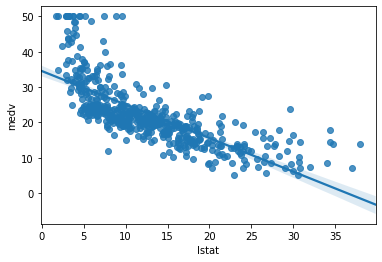

In [24]:
sns.regplot('lstat', 'medv', data=boston)

## 3. Multiple Linear Regression

In [25]:
x_train = boston[['lstat', 'age']]
y_true = boston['medv']

In [51]:
ols_sm_2 = smf.ols('medv ~ lstat + age', data=boston).fit()

In [55]:
print(ols_sm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           2.98e-88
Time:                        22:36:38   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.0

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

boston_exog = sm.add_constant(boston.drop('medv', axis=1))

for i, col in enumerate(boston_exog.columns):
    if col == 'const':
        pass
    elif len(col) > 6:
        print(col,':','{0:.2f}'.format(vif(boston_exog.values, i)))
    else:
        print(col, '\t:', '{0:.2f}'.format(vif(boston_exog.values, i)))

crim 	: 1.79
zn 	: 2.30
indus 	: 3.99
chas 	: 1.07
nox 	: 4.39
rm 	: 1.93
age 	: 3.10
dis 	: 3.96
rad 	: 7.48
tax 	: 9.01
ptratio : 1.80
black 	: 1.35
lstat 	: 2.94


## 4. Interaction Terms

### 1

In [62]:
ols_smf = smf.ols(formula='medv ~ lstat * age', data=boston)

In [63]:
ols_smf_results = ols_smf.fit()

In [65]:
print(ols_smf_results.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 03 Aug 2020   Prob (F-statistic):           4.86e-88
Time:                        22:44:36   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.0

## 5. Non-Linear Transformation

### 1

In [66]:
ols_smf_poly = smf.ols('medv ~ lstat + np.power(lstat,2)', data=boston).fit()

In [67]:
print(ols_smf_poly.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.56e-112
Time:                        22:48:31   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0

## 6. Qualitative Predictors

### 1

In [68]:
carseats = pd.read_csv('datasets/Carseats.csv', index_col=0)
carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [69]:
carseats_trans=pd.get_dummies(carseats)

In [70]:
carseats_trans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 1 to 400
Data columns (total 15 columns):
Sales               400 non-null float64
CompPrice           400 non-null int64
Income              400 non-null int64
Advertising         400 non-null int64
Population          400 non-null int64
Price               400 non-null int64
Age                 400 non-null int64
Education           400 non-null int64
ShelveLoc_Bad       400 non-null uint8
ShelveLoc_Good      400 non-null uint8
ShelveLoc_Medium    400 non-null uint8
Urban_No            400 non-null uint8
Urban_Yes           400 non-null uint8
US_No               400 non-null uint8
US_Yes              400 non-null uint8
dtypes: float64(1), int64(7), uint8(7)
memory usage: 30.9 KB


In [71]:
x_train = carseats_trans.drop(columns=['Sales'])
y_true = carseats_trans['Sales']

In [75]:
ols_sm_car = sm.OLS(y_true, sm.add_constant(x_train)).fit()

In [77]:
print(ols_sm_car.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 03 Aug 2020   Prob (F-statistic):          1.60e-166
Time:                        22:56:55   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                3.3853      0.253  

In [78]:
original = carseats['ShelveLoc']
prep = carseats_trans[['ShelveLoc_Bad', 'ShelveLoc_Good','ShelveLoc_Medium']]

In [79]:
compare = pd.concat([original, prep], axis=1)
compare

,ShelveLoc,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium
1,Bad,1,0,0
2,Good,0,1,0
3,Medium,0,0,1
4,Medium,0,0,1
5,Bad,1,0,0
...,...,...,...,...
396,Good,0,1,0
397,Medium,0,0,1
398,Medium,0,0,1
399,Bad,1,0,0
